# Data Cleaning and Preprocessing

In [2]:
#1. READING THE EXCEL FILE.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_excel("Netflix_Churn_Analysis.xlsx", sheet_name="netflix_users")
df

,User_ID,NAME,Age,Country,Subscription_Type,Favorite_Genre,Preferred_Genre,Last Login Date,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Payment History (Most Often),Churn Status (Yes/No),Support Queries Logged,Promotional Offers Used,Number of Profiles Created
0,1,Carlos Schmitt,18,USA,Premium,Drama,Sci-Fi,2025-04-26,12,8,4.85,9,Tablet,On-Time,No,0,2,1
1,2,Leslie Wolfe,23,Mexico,Premium,Sci-Fi,Documentary,2025-04-30,12,4,1.75,3,Laptop,On-Time,Yes,3,3,2
2,3,Michael Bryant,60,USA,Basic,Comedy,Romance,2025-06-05,3,5,2.75,6,Smart TV,On-Time,Yes,4,3,1
3,4,Taylor Singh,44,USA,Premium,Documentary,Documentary,2025-05-12,3,8,3.00,8,Smart TV,Delayed,No,1,1,1
4,5,Timothy Higgins,68,USA,Standard,Drama,Comedy,2025-05-29,24,1,1.37,3,Mobile,On-Time,Yes,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25135,25136,Johnathan Terry,41,India,Standard,Thriller,Drama,2025-05-15,24,10,3.67,8,Laptop,Delayed,No,3,2,3
25136,25137,Gordon Cordova,25,USA,Premium,Thriller,Romance,2025-05-24,3,5,1.64,4,Desktop,On-Time,No,2,3,1
25137,25138,Carol Mitchell,51,Germany,Standard,Thriller,Documentary,2025-05-30,12,7,1.26,3,Smart TV,Delayed,No,1,0,1
25138,25139,Mark Patrick,63,Germany,Standard,Thriller,Sci-Fi,2025-05-06,6,8,1.89,4,Smart TV,On-Time,No,2,3,3


In [3]:
# Numerical Columns
numeric_cols = df.select_dtypes(include=['number'])
print(numeric_cols.dtypes)

# Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
print(categorical_cols.dtypes)

# Datetime Columns
datetime_cols = df.select_dtypes(include=['datetime'])
print(datetime_cols.dtypes)

User_ID                                 int64
Age                                     int64
Subscription Length (Months)            int64
Customer Satisfaction Score (1-10)      int64
Daily Watch Time (Hours)              float64
Engagement Rate (1-10)                  int64
Support Queries Logged                  int64
Promotional Offers Used                 int64
Number of Profiles Created              int64
dtype: object
NAME                            object
Country                         object
Subscription_Type               object
Favorite_Genre                  object
Preferred_Genre                 object
Device Used Most Often          object
Payment History (Most Often)    object
Churn Status (Yes/No)           object
dtype: object
Last Login Date    datetime64[ns]
dtype: object


In [4]:
#2. DATA CLEANING AND PREPROCESSING
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25140 entries, 0 to 25139
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   User_ID                             25140 non-null  int64         
 1   NAME                                25140 non-null  object        
 2   Age                                 25140 non-null  int64         
 3   Country                             25140 non-null  object        
 4   Subscription_Type                   25140 non-null  object        
 5   Favorite_Genre                      25140 non-null  object        
 6   Preferred_Genre                     25140 non-null  object        
 7   Last Login Date                     25140 non-null  datetime64[ns]
 8   Subscription Length (Months)        25140 non-null  int64         
 9   Customer Satisfaction Score (1-10)  25140 non-null  int64         
 10  Daily Watch Time (Hour

,User_ID,NAME,Age,Country,Subscription_Type,Favorite_Genre,Preferred_Genre,Last Login Date,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Payment History (Most Often),Churn Status (Yes/No),Support Queries Logged,Promotional Offers Used,Number of Profiles Created
0,1,Carlos Schmitt,18,USA,Premium,Drama,Sci-Fi,2025-04-26,12,8,4.85,9,Tablet,On-Time,No,0,2,1
1,2,Leslie Wolfe,23,Mexico,Premium,Sci-Fi,Documentary,2025-04-30,12,4,1.75,3,Laptop,On-Time,Yes,3,3,2
2,3,Michael Bryant,60,USA,Basic,Comedy,Romance,2025-06-05,3,5,2.75,6,Smart TV,On-Time,Yes,4,3,1
3,4,Taylor Singh,44,USA,Premium,Documentary,Documentary,2025-05-12,3,8,3.00,8,Smart TV,Delayed,No,1,1,1
4,5,Timothy Higgins,68,USA,Standard,Drama,Comedy,2025-05-29,24,1,1.37,3,Mobile,On-Time,Yes,3,1,3


In [5]:
# Changed data type of Last_Login col from object to datetime
df['Last Login Date'] = pd.to_datetime(df['Last Login Date'])

# Checked the presence of null values
df.isnull().sum()

User_ID                               0
NAME                                  0
Age                                   0
Country                               0
Subscription_Type                     0
Favorite_Genre                        0
Preferred_Genre                       0
Last Login Date                       0
Subscription Length (Months)          0
Customer Satisfaction Score (1-10)    0
Daily Watch Time (Hours)              0
Engagement Rate (1-10)                0
Device Used Most Often                0
Payment History (Most Often)          0
Churn Status (Yes/No)                 0
Support Queries Logged                0
Promotional Offers Used               0
Number of Profiles Created            0
dtype: int64

In [6]:
df.describe()

,User_ID,Age,Last Login Date,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Promotional Offers Used,Number of Profiles Created
count,25140.00000,25140.000000,25140,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000,25140.000000
mean,12570.50000,46.467303,2025-05-16 04:18:43.818615552,9.162967,6.384805,2.744593,6.223827,2.411973,2.504574,1.995068
min,1.00000,13.000000,2025-03-20 00:00:00,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000
25%,6285.75000,29.000000,2025-05-05 00:00:00,3.000000,4.000000,1.620000,4.000000,1.000000,1.000000,1.000000
50%,12570.50000,46.000000,2025-05-17 00:00:00,6.000000,7.000000,2.740000,7.000000,2.000000,3.000000,2.000000
75%,18855.25000,63.000000,2025-05-29 00:00:00,12.000000,9.000000,3.852500,8.000000,4.000000,4.000000,3.000000
max,25140.00000,80.000000,2025-06-10 00:00:00,24.000000,10.000000,5.000000,10.000000,6.000000,5.000000,3.000000
std,7257.43722,19.573879,NaN,8.252141,2.702534,1.298205,2.519517,1.851117,1.709552,0.817228


In [7]:
# Changed User_ID values from 1,2,...10,...25140 to C00001,C00002,....C00010,...C25140
df['User_ID'] = df['User_ID'].apply(lambda x: f"C{x:05d}") 

df["User_ID"]

0        C00001
1        C00002
2        C00003
3        C00004
4        C00005
          ...  
25135    C25136
25136    C25137
25137    C25138
25138    C25139
25139    C25140
Name: User_ID, Length: 25140, dtype: object

In [8]:
df.columns.tolist()

['User_ID',
 'NAME',
 'Age',
 'Country',
 'Subscription_Type',
 'Favorite_Genre',
 'Preferred_Genre',
 'Last Login Date',
 'Subscription Length (Months)',
 'Customer Satisfaction Score (1-10)',
 'Daily Watch Time (Hours)',
 'Engagement Rate (1-10)',
 'Device Used Most Often',
 'Payment History (Most Often)',
 'Churn Status (Yes/No)',
 'Support Queries Logged',
 'Promotional Offers Used',
 'Number of Profiles Created']

In [9]:
# Dropped and Renamed column.
df.drop(columns='Favorite_Genre', inplace=True)

df.rename(columns={'Preferred_Genre': 'Favourite_Genre'}, inplace=True)

In [10]:
df.duplicated().sum() # Checked for the presence of duplicate rows

np.int64(0)

In [11]:
df["User_ID"].duplicated().sum() # Checked whether any customer has occured more than once 
# User_ID is the unique key. 

np.int64(0)

In [12]:
df.columns= df.columns.str.lower()
# Changed all column names to lowercase.

df.columns= df.columns.str.replace(r"\s*\(.*?\)", "", regex=True).str.strip().str.replace(" ", "_")
# Changed column names that include anything in parenthesis and replaced spaces in between with underscores.

df.columns

Index(['user_id', 'name', 'age', 'country', 'subscription_type',
       'favourite_genre', 'last_login_date', 'subscription_length',
       'customer_satisfaction_score', 'daily_watch_time', 'engagement_rate',
       'device_used_most_often', 'payment_history', 'churn_status',
       'support_queries_logged', 'promotional_offers_used',
       'number_of_profiles_created'],
      dtype='object')

# Q1. What is the overall churn rate?

In [13]:
churn_counts = df['churn_status'].value_counts()
churn_counts

churn_status
No     16440
Yes     8700
Name: count, dtype: int64

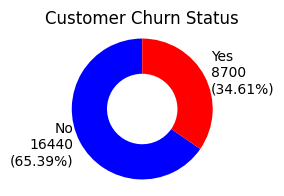

In [14]:
labels = churn_counts.index
values = churn_counts.values
total = values.sum()

label_with_counts = [f"{label}\n{count}\n({count/total:.2%})" for label, count in zip(labels, values)]
label_with_counts

plt.figure(figsize=(2, 2))

plt.pie(
    values,
    labels=label_with_counts,
    colors=['blue', 'red'],  # Blue for No, Red for Yes
    startangle=90,
    wedgeprops=dict(width=0.5)  # Makes a donut-style pie (optional)
)

plt.title('Customer Churn Status')
plt.axis('equal')  # Keeps pie circular
plt.show()
#plt.savefig("churn_pie_chart.png")

# Q2. Which age groups have the highest user numbers and highest churn rate?

In [15]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 30, 40, 50, 60, 70, 81],  # age edges
    labels=['<18', '18–29', '30–39', '40–49', '50–59', '60–69', '70–80'],  # group labels
    right=False  # include lower bound, exclude upper
)
# had to create this age_group column inside the dataframe to be able to perform Filtering,Grouping,Visualization,Analysis.

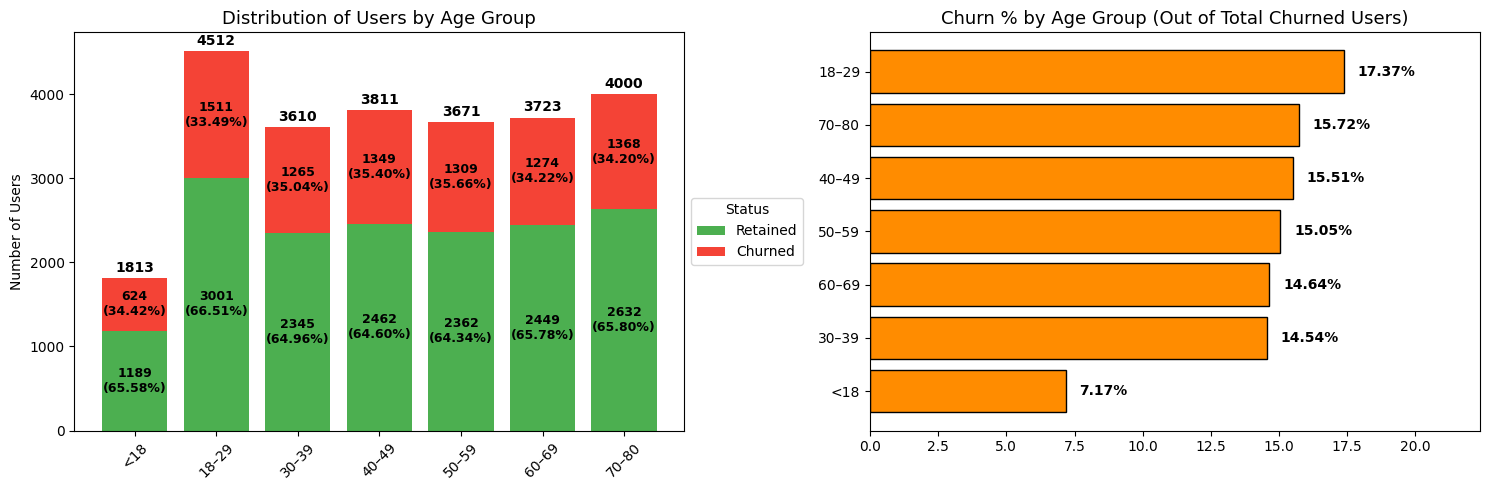

In [16]:
# Create cross-tab
churn_by_age_group = pd.crosstab(df['age_group'], df['churn_status'])
total_churned_users = df[df['churn_status'] == 'Yes'].shape[0]
age_group_totals = churn_by_age_group.sum(axis=1)
overall_total_users = df.shape[0]

retained = churn_by_age_group['No']
churned = churn_by_age_group['Yes']
retained_pct = (retained / age_group_totals) * 100
churned_pct = (churned / age_group_totals) * 100
churn_pct_of_total = (churned / total_churned_users) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
x = np.arange(len(age_group_totals))

# --- First plot: stacked bar chart ---
bars1 = ax1.bar(x, retained, label='Retained', color='#4CAF50')
bars2 = ax1.bar(x, churned, bottom=retained, label='Churned', color='#F44336')

for i in range(len(x)):
    ax1.text(x[i], retained.iloc[i] / 2,
             f"{retained.iloc[i]}\n({retained_pct.iloc[i]:.2f}%)",
             ha='center', va='center', fontsize=9, fontweight='bold', color='black')
    
    ax1.text(x[i], retained.iloc[i] + churned.iloc[i] / 2,
             f"{churned.iloc[i]}\n({churned_pct.iloc[i]:.2f}%)",
             ha='center', va='center', fontsize=9, fontweight='bold', color='black')
    
    ax1.text(x[i], retained.iloc[i] + churned.iloc[i] + 40,
             f"{age_group_totals.iloc[i]}",
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax1.set_title("Distribution of Users by Age Group", fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels(age_group_totals.index, rotation=45)
ax1.set_ylabel("Number of Users")
ax1.legend(title='Status',bbox_to_anchor=(1.00, 0.5), loc='center left')

# --- Second plot: churn % (horizontal bar chart) ---
churn_pct_of_total_sorted = churn_pct_of_total.sort_values(ascending=True)
bars = ax2.barh(churn_pct_of_total_sorted.index, churn_pct_of_total_sorted, color='darkorange', edgecolor='black')

for i, pct in enumerate(churn_pct_of_total_sorted):
    ax2.text(pct + 0.5, i, f"{pct:.2f}%", va='center', fontsize=10, fontweight='bold')

ax2.set_title("Churn % by Age Group (Out of Total Churned Users)", fontsize=13)
ax2.set_xlim(0, churn_pct_of_total.max() + 5)

plt.tight_layout()
plt.show()


# Q3. Which countries show the highest and lowest churn?

In [17]:
# Filtered only churned users
churned = df[df['churn_status'] == 'Yes']

# Counted churned users per country
churned_counts_by_country = churned['country'].value_counts().reset_index()
churned_counts_by_country.columns = ['country', 'churned_user_count']

# Added a column for total churned users (same value for all rows)
total_churned = churned.shape[0]
churned_counts_by_country['total_churned_users'] = total_churned

churned_counts_by_country

,country,churned_user_count,total_churned_users
0,USA,2000,8700
1,Canada,725,8700
2,Mexico,696,8700
3,Japan,691,8700
4,Brazil,671,8700
5,Austarlia,662,8700
6,UK,660,8700
7,France,654,8700
8,Germany,651,8700
9,Argentina,648,8700


In [18]:
# Step 1: Count total users per country
total_users_per_country = df['country'].value_counts().reset_index()
total_users_per_country.columns = ['country', 'total_users']

# Step 2: Count churned users per country
churned_users_per_country = df[df['churn_status'] == 'Yes']['country'].value_counts().reset_index()
churned_users_per_country.columns = ['country', 'churned_users']

# Step 3: Merge the two
churn_rate_country = pd.merge(total_users_per_country, churned_users_per_country, on='country', how='left')

# Step 4: Fill missing churned_users with 0
churn_rate_country['churned_users'] = churn_rate_country['churned_users'].fillna(0).astype(int)

# Step 5: Calculate churn percentage per country
churn_rate_country['churn_rate (%)'] = ((churn_rate_country['churned_users'] / churn_rate_country['total_users']) * 100).round(2)

# Step 6: Sort by churn rate descending
churn_rate_country = churn_rate_country.sort_values(by='churn_rate (%)', ascending=False)

churn_rate_country



,country,total_users,churned_users,churn_rate (%)
2,Canada,1985,725,36.52
4,Mexico,1936,696,35.95
10,UK,1851,660,35.66
8,Austarlia,1895,662,34.93
3,Japan,1983,691,34.85
9,France,1878,654,34.82
7,Germany,1905,651,34.17
0,USA,5859,2000,34.14
6,Argentina,1922,648,33.71
1,Brazil,1997,671,33.60


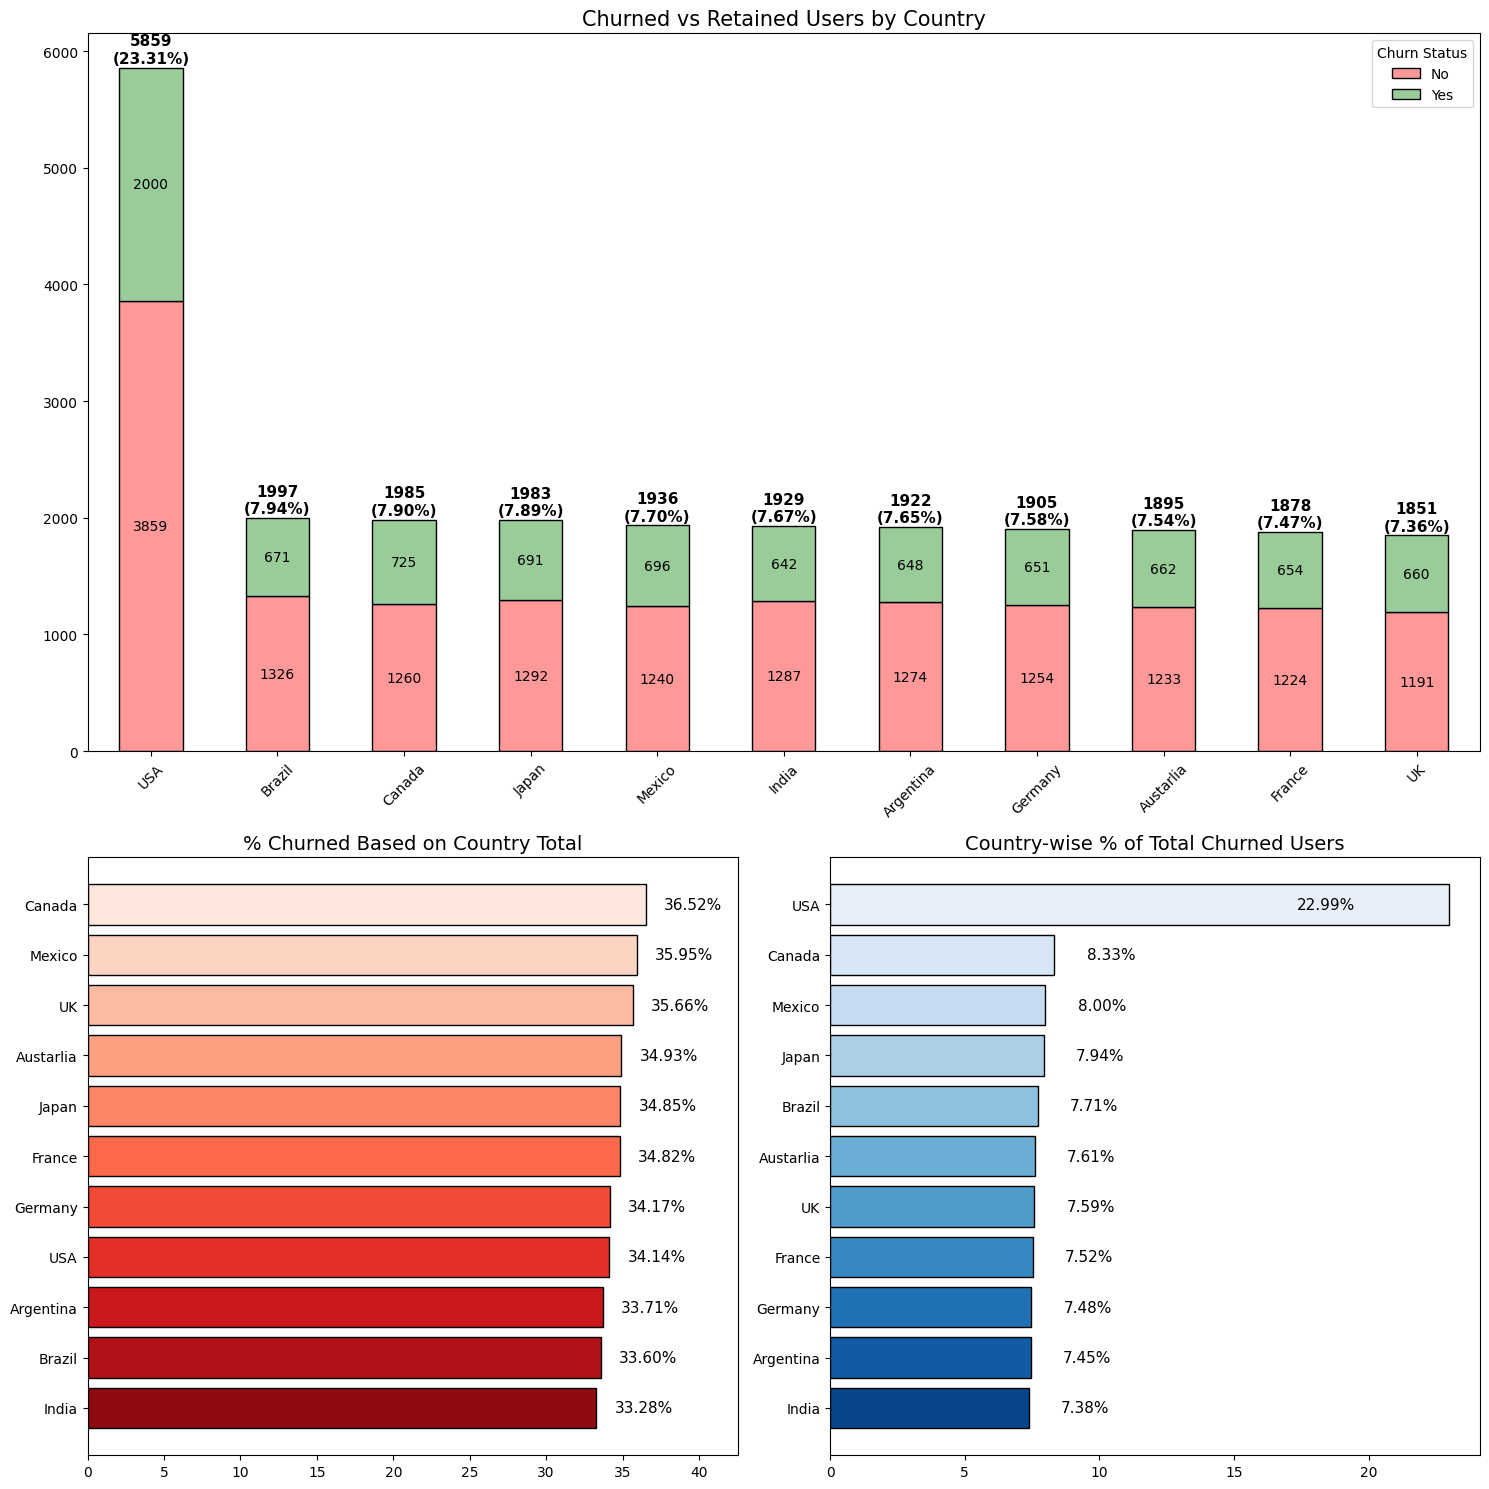

In [19]:
# gridspec is used here to specify the layout of the subplots
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.2, 1])  

# First plot (full width on top)
ax1 = fig.add_subplot(gs[0, :])

# Second plot (bottom left)
ax2 = fig.add_subplot(gs[1, 0])

# Third plot (bottom right)
ax3 = fig.add_subplot(gs[1, 1])


## Plot 1
churn_counts = (
    df.groupby(['country', 'churn_status'])
      .size()
      .unstack(fill_value=0)
      .loc[lambda x: x.sum(axis=1).sort_values(ascending=False).index]   
)

bars = churn_counts.plot(kind='bar', stacked=True, ax=ax1,
                         color=['#ff9999', '#99cc99'], edgecolor='black')
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y()
            bars.text(x, y + height / 2, f"{int(height)}", ha='center', va='center', fontsize=10)

# Calculate totals per country directly from churn_counts
global_total = churn_counts.values.sum()   # grand total (all churn + retained)

for idx, total in enumerate(churn_counts.sum(axis=1)):  # row-wise totals
    perc = (total / global_total) * 100
    ax1.text(idx, total + 40, f"{total}\n({perc:.2f}%)", 
             ha='center', fontsize=11, fontweight='bold')

ax1.set_title('Churned vs Retained Users by Country', fontsize=15)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel("") 
ax1.legend(title='Churn Status')


## Plot 2 - Churn Rate (%), sorted
churn_rate_sorted = churn_rate_country.sort_values(by='churn_rate (%)', ascending=False)

colors = sns.color_palette("Reds", len(churn_rate_sorted))
ax2.barh(churn_rate_sorted['country'], churn_rate_sorted['churn_rate (%)'], 
         color=colors, edgecolor='black')
max_val = churn_rate_sorted['churn_rate (%)'].max()
ax2.set_xlim(0, max_val + 6) 
for i, val in enumerate(churn_rate_sorted['churn_rate (%)']):
    ax2.text(val + 5, i, f"{val:.2f}%",
             va='center', ha='right' if val > 5 else 'left', fontsize=11, color='black')
ax2.set_title('% Churned Based on Country Total', fontsize=14)
ax2.invert_yaxis()

## Plot 3 - % of Total Churned Users
churned_counts_by_country['churn_share (%)'] = (
    churned_counts_by_country['churned_user_count'] / churned_counts_by_country['total_churned_users'] * 100
).round(2)

colors2 = sns.color_palette("Blues", len(churned_counts_by_country))
ax3.barh(churned_counts_by_country['country'], churned_counts_by_country['churn_share (%)'], 
         color=colors2, edgecolor='black')
for i, val in enumerate(churned_counts_by_country['churn_share (%)']):
    ax3.text(val + 3 if val <= 10 else val - 3.5, i, f"{val:.2f}%",
             va='center', ha='right' if val > 5 else 'left', fontsize=11, color='black')
ax3.set_title('Country-wise % of Total Churned Users', fontsize=14)
ax3.invert_yaxis()

plt.tight_layout()
plt.show()


# Q4. Is churn rate different across subscription types?

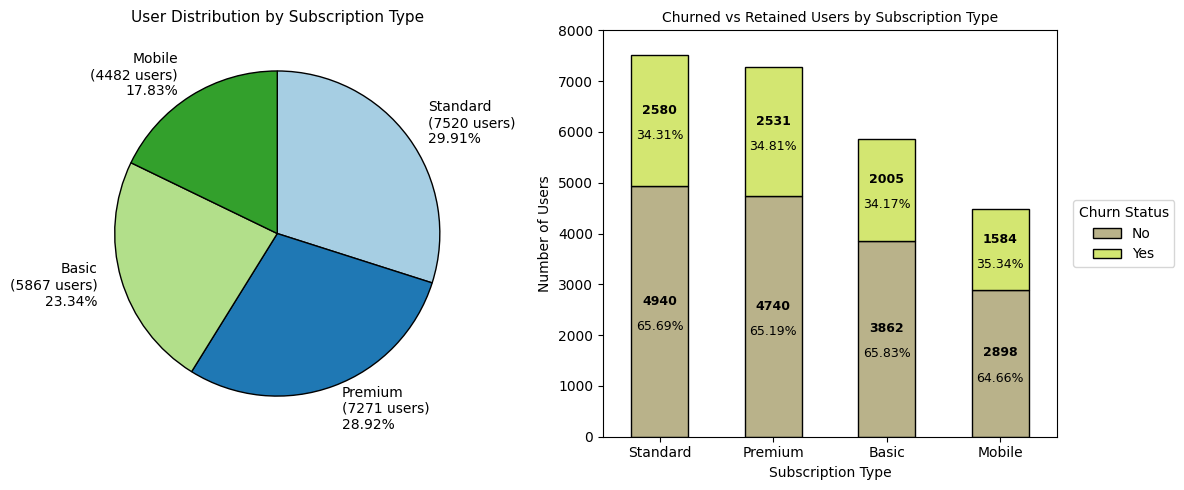

In [20]:
# a) User Distribution by Subscription Type
# Step 1: Count subscription types and sort descending
subscription_counts = df['subscription_type'].value_counts().sort_values(ascending=False)

# Step 2: Create formatted labels with count and percentage
total_users = subscription_counts.sum()
pie_labels = [f"{label}\n({count} users)\n{(count / total_users):.2%}" 
              for label, count in zip(subscription_counts.index, subscription_counts.values)]

# Step 3: Create subscription vs churn table
churn_by_subscription = pd.crosstab(df['subscription_type'], df['churn_status'])

# Step 4: Add total and sort by total
churn_by_subscription['Total'] = churn_by_subscription.sum(axis=1)
churn_by_subscription_sorted = churn_by_subscription.sort_values(by='Total', ascending=False)
churn_counts_only = churn_by_subscription_sorted.drop(columns='Total')

# Step 5: Plotting both charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


# --- Pie Chart ---
ax1.pie(
    subscription_counts.values,
    labels=pie_labels,
    startangle=90, # Start from top
    counterclock=False, # Clockwise
    labeldistance=1.15,  # Push labels out
    colors=plt.cm.Paired.colors,
    wedgeprops=dict(edgecolor='black'),
    textprops={'fontsize': 10}
)
ax1.set_title('User Distribution by Subscription Type', fontsize=11)


# --- Stacked Bar Chart ---
bars = churn_counts_only.plot(kind='bar', stacked=True, ax=ax2,
                              color=['#B9B28A', '#D3E671'], edgecolor='black')

# Add individual segment labels (count + % below)
for i, container in enumerate(bars.containers):
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y()
            sub_index = int(x + 0.5)  # Get correct index based on x-axis position
            total = churn_by_subscription_sorted.iloc[sub_index]['Total']
            pct = (height / total) * 100
            bars.text(x, y + height / 2 + 200, f"{int(height)}", 
                      ha='center', va='center', fontsize=9, fontweight='bold')
            bars.text(x, y + height / 2 - 300, f"{pct:.2f}%", 
                      ha='center', va='center', fontsize=9, color='black')


#  # Add total labels on top
# totals = churn_by_subscription_sorted['Total'].values
# positions = range(len(totals))
# for pos, total in zip(positions, totals):
#     ax2.text(pos, total + 70, f'Total: {total}', ha='center', va='bottom',
#              fontsize=9, fontweight='bold', color='black')

# Formatting
ax2.set_title('Churned vs Retained Users by Subscription Type', fontsize=10)
ax2.set_xlabel('Subscription Type')
ax2.set_ylabel('Number of Users')
ax2.set_ylim(0, 8000)
ax2.set_xticklabels(churn_counts_only.index, rotation=0)
ax2.legend(title='Churn Status', bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()


# Q5. Which device-subscription combinations dominate churned user behavior?

In [21]:
# Filter churned users
churned = df[df['churn_status'] == 'Yes']

# Total churned users for reference
total_churned = churned.shape[0]

# Step 1: Count churned users by device and subscription
grouped = churned.groupby(['device_used_most_often', 'subscription_type']).size().unstack(fill_value=0)

# Step 2: Convert to % of total churned users
grouped_pct = (grouped / total_churned * 100).round(3)

# Step 3: Add a column for total churn % by device
grouped_pct['Total % by Device'] = grouped_pct.sum(axis=1).round(2)

# Step 4: Sort rows by total churn %
grouped_pct = grouped_pct.sort_values(by='Total % by Device', ascending=False)

# Display
grouped_pct


subscription_type,Basic,Mobile,Premium,Standard,Total % by Device
device_used_most_often,,,,,
Smart TV,5.425,0.000,6.885,8.092,20.40
Mobile,3.782,8.057,4.816,3.621,20.28
Laptop,5.529,0.000,7.264,7.460,20.25
Desktop,5.793,0.000,6.483,7.575,19.85
Tablet,2.517,10.149,3.644,2.908,19.22


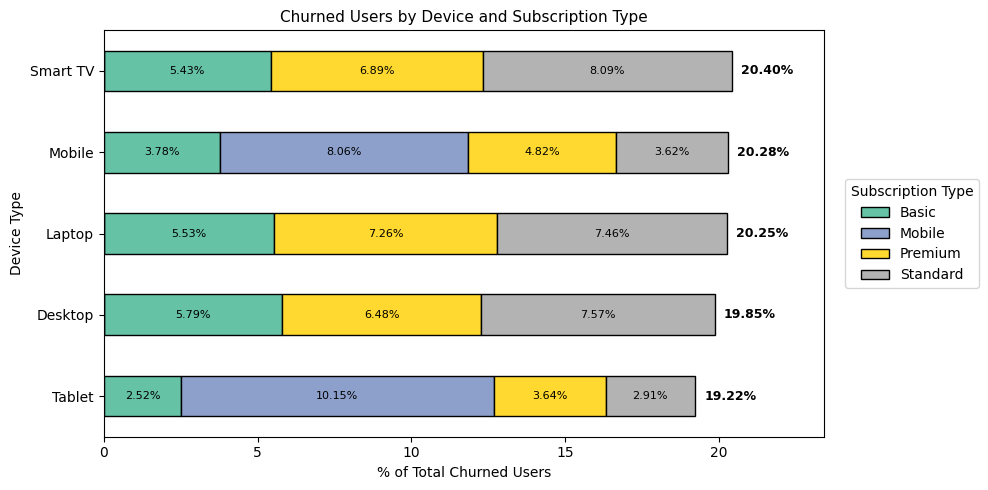

In [22]:
# Step 1: Prepare churned user data
churned = df[df['churn_status'] == 'Yes']
total_churned = len(churned)

# Step 2: Compute % of total churned users by device and subscription type
grouped = churned.groupby(['device_used_most_often', 'subscription_type']).size().unstack(fill_value=0)
grouped_pct = grouped.div(total_churned).mul(100)

# Step 3: Sort subscriptions (columns) by value descending within each row
grouped_pct = grouped_pct.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Step 4: Add total % per device and sort devices in reverse order
grouped_pct['Total % by Device'] = grouped_pct.sum(axis=1)
grouped_pct = grouped_pct.sort_values(by='Total % by Device', ascending=True)

# Reverse the row order (Smart TV on top)
#grouped_pct = grouped_pct[::-1]

# Step 5: Plot
ax = grouped_pct.drop(columns='Total % by Device').plot(
    kind='barh', stacked=True, figsize=(10, 5), colormap='Set2', edgecolor='black'
)

# Step 6: Add % labels inside bars (hide near-zero ones), and total % at the end
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0.5:  # Skip tiny labels
            ax.text(
                bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                f"{width:.2f}%", ha='center', va='center', fontsize=8
            )

# Add total % at the right end of each bar
for idx, device in enumerate(grouped_pct.index):
    total_pct = grouped_pct.loc[device, 'Total % by Device']
    ax.text(grouped_pct.drop(columns='Total % by Device').loc[device].sum() + 0.3, idx,
            f"{total_pct:.2f}%", va='center', fontsize=9, fontweight='bold')

# Formatting
ax.set_title('Churned Users by Device and Subscription Type', fontsize=11)
ax.set_xlabel('% of Total Churned Users')
ax.set_ylabel('Device Type')
ax.set_xlim(0, grouped_pct['Total % by Device'].max() + 3)
ax.legend(title='Subscription Type', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()


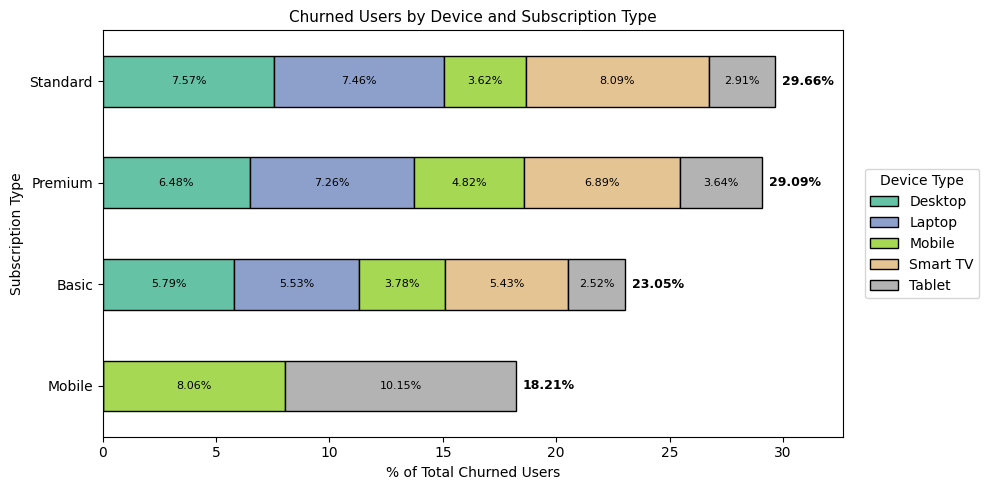

In [23]:
# Step 1: Prepare churned user data
churned = df[df['churn_status'] == 'Yes']
total_churned = len(churned)

# Step 2: Compute % of total churned users by device and subscription type
grouped = churned.groupby(['subscription_type', 'device_used_most_often']).size().unstack(fill_value=0)
grouped_pct = grouped.div(total_churned).mul(100)

# Step 3: Sort subscriptions (columns) by value descending within each row
grouped_pct = grouped_pct.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Step 4: Add total % per device and sort devices in reverse order
grouped_pct['Total % by Subscription Plan'] = grouped_pct.sum(axis=1)
grouped_pct = grouped_pct.sort_values(by='Total % by Subscription Plan', ascending=True)

# Reverse the row order (Smart TV on top)
#grouped_pct = grouped_pct[::-1]

# Step 5: Plot
ax = grouped_pct.drop(columns='Total % by Subscription Plan').plot(
    kind='barh', stacked=True, figsize=(10, 5), colormap='Set2', edgecolor='black'
)

# Step 6: Add % labels inside bars (hide near-zero ones), and total % at the end
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0.5:  # Skip tiny labels
            ax.text(
                bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                f"{width:.2f}%", ha='center', va='center', fontsize=8
            )

# Add total % at the right end of each bar
for idx, device in enumerate(grouped_pct.index):
    total_pct = grouped_pct.loc[device, 'Total % by Subscription Plan']
    ax.text(grouped_pct.drop(columns='Total % by Subscription Plan').loc[device].sum() + 0.3, idx,
            f"{total_pct:.2f}%", va='center', fontsize=9, fontweight='bold')

# Formatting
ax.set_title('Churned Users by Device and Subscription Type', fontsize=11)
ax.set_xlabel('% of Total Churned Users')
ax.set_ylabel('Subscription Type')
ax.set_xlim(0, grouped_pct['Total % by Subscription Plan'].max() + 3)
ax.legend(title='Device Type', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()


# Q6.How do satisfaction, engagement, and support interactions vary between churned and retained users across subscription plans?

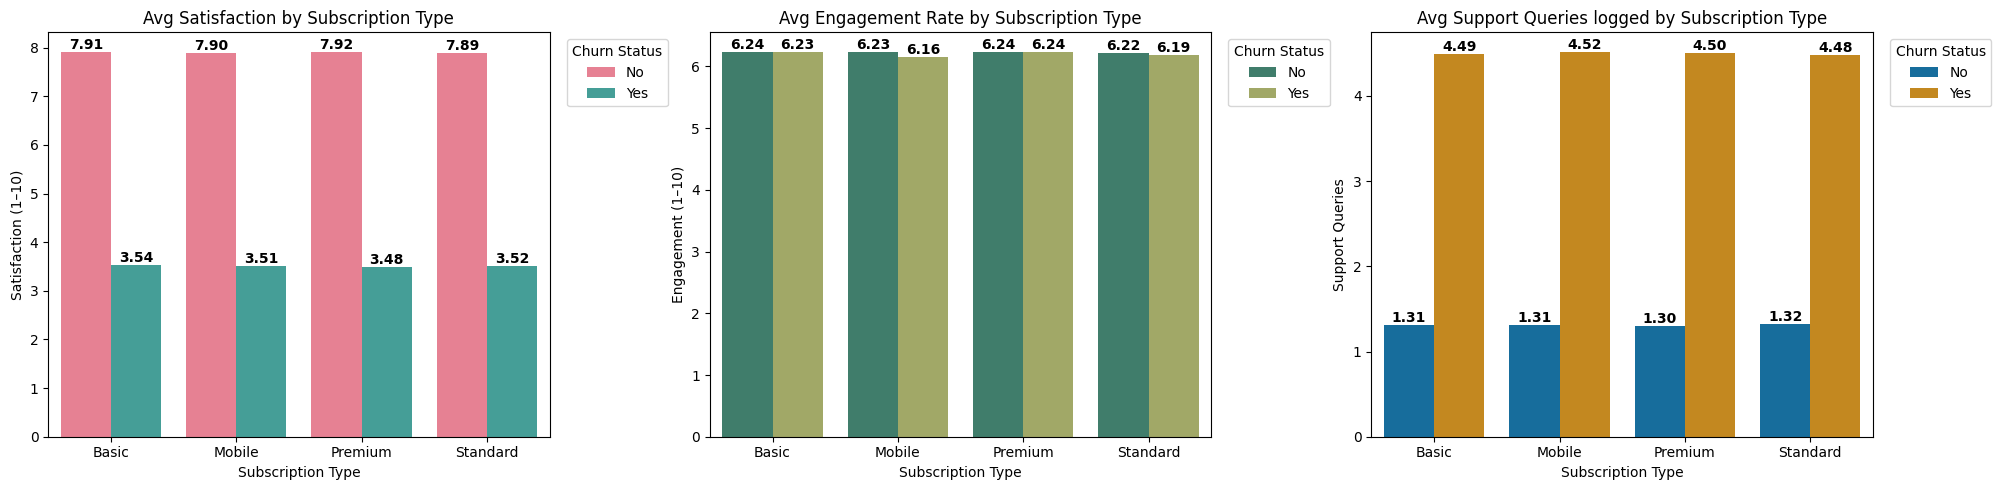

In [24]:
# STEP 1: Group the data by subscription type and churn status
summary = df.groupby(['subscription_type', 'churn_status']).agg({
    'customer_satisfaction_score': 'mean',
    'engagement_rate': 'mean',
    'support_queries_logged': 'mean'
}).round(2).reset_index()

# STEP 2: Set up a 1-row, 3-column figure for side-by-side charts
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# === PLOT 1: Average Customer Satisfaction ===
sns.barplot(
    data=summary,
    x='subscription_type',
    y='customer_satisfaction_score',
    hue='churn_status',
    ax=axes[0],
    palette='husl',
    dodge=True
)
axes[0].set_title("Avg Satisfaction by Subscription Type")
axes[0].set_ylabel("Satisfaction (1–10)")
axes[0].set_xlabel("Subscription Type")
for bar in axes[0].patches:
    height = bar.get_height()
    if height > 0:
        axes[0].annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2., height),
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

# === PLOT 2: Average Engagement Rate ===
sns.barplot(
    data=summary,
    x='subscription_type',
    y='engagement_rate',
    hue='churn_status',
    ax=axes[1],
    palette='gist_earth',
    dodge=True
)
axes[1].set_title("Avg Engagement Rate by Subscription Type")
axes[1].set_ylabel("Engagement (1–10)")
axes[1].set_xlabel("Subscription Type")
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
        axes[1].annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2., height),
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

# === PLOT 3: Average Support Queries Logged ===
sns.barplot(
    data=summary,
    x='subscription_type',
    y='support_queries_logged',
    hue='churn_status',
    ax=axes[2],
    palette='colorblind',
    dodge=True
)
axes[2].set_title("Avg Support Queries logged by Subscription Type")
axes[2].set_ylabel("Support Queries")
axes[2].set_xlabel("Subscription Type")
for bar in axes[2].patches:
    height = bar.get_height()
    if height > 0:
        axes[2].annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2., height),
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

# STEP 3: Position legends nicely
for ax in axes:
    ax.legend(title='Churn Status', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


# Q7. Does longer subscription length reduce churn?

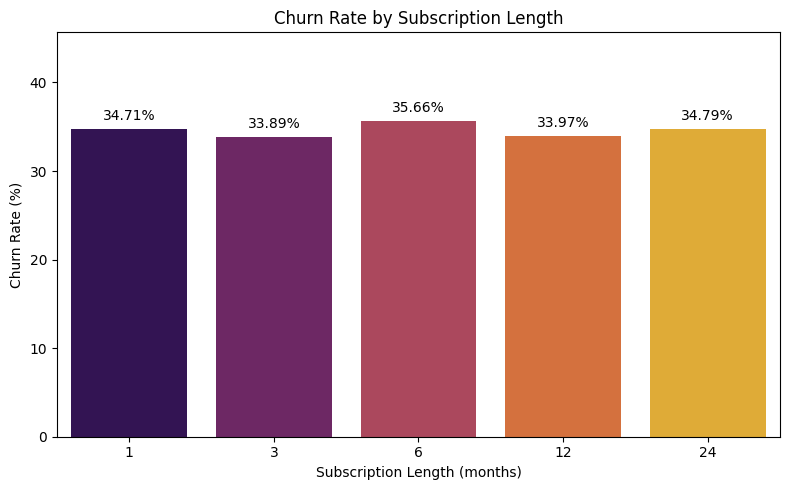

In [25]:
# STEP 1: Group by subscription length and churn status
churn_length = df.groupby(['subscription_length', 'churn_status'])['user_id'].count().unstack().fillna(0)

# STEP 2: Calculate churn rate
churn_length['total_users'] = churn_length.sum(axis=1)
churn_length['churn_rate'] = (churn_length['Yes'] / churn_length['total_users']) * 100

# STEP 3: Prepare data for plotting
churn_df = churn_length.reset_index()
churn_df['subscription_length_str'] = churn_df['subscription_length'].astype(str)  # Optional string labels

# STEP 4: Plot
plt.figure(figsize=(8, 5))

sns.barplot(
    data=churn_df,
    x='subscription_length_str',       # Use string version for axis
    y='churn_rate',
    hue='subscription_length_str',     # Same as x to avoid warning and color bars
    palette='inferno',
    legend=False
)

plt.title("Churn Rate by Subscription Length")
plt.xlabel("Subscription Length (months)")
plt.ylabel("Churn Rate (%)")

# Add value labels on bars
for i, value in enumerate(churn_df['churn_rate']):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

plt.ylim(0, churn_df['churn_rate'].max() + 10)
plt.tight_layout()
plt.show()


# Q8. How does churn vary by genre?

In [26]:
# genre_churn = pd.crosstab(df['favourite_genre'], df['churn_status']) \
#   .assign(Total_Users=lambda x: x.sum(axis=1)) \
#   .assign(Churn_Percent=lambda x: round((x['Yes'] / x['Total_Users']) * 100, 2)).astype(str) + '%'\
#   .sort_values(by='Yes', ascending=False)


genre_churn = pd.crosstab(df['favourite_genre'], df['churn_status']) \
  .assign(Total_Users=lambda x: x.sum(axis=1)) \
  .assign(Churn_Percent_Of_Own_User_Base=lambda x: x.apply(lambda row: f"{(row['Yes'] / row['Total_Users']) \
    * 100:.2f}%", axis=1)) \
  .sort_values(by='Yes', ascending=False)



genre_churn

churn_status,No,Yes,Total_Users,Churn_Percent_Of_Own_User_Base
favourite_genre,,,,
Horror,2195,1732,3927,44.10%
Comedy,2146,1224,3370,36.32%
Drama,2064,1012,3076,32.90%
Romance,1924,989,2913,33.95%
Sci-Fi,2023,956,2979,32.09%
Action,1968,942,2910,32.37%
Documentary,2009,941,2950,31.90%
Thriller,2111,904,3015,29.98%


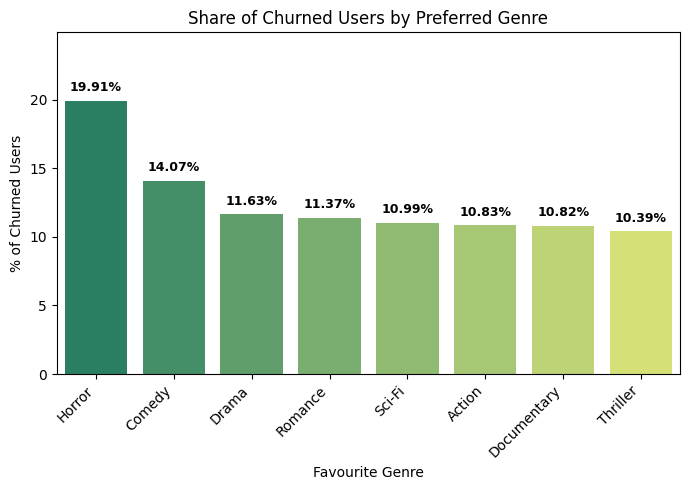

In [27]:
#VISUALIZATION 1): Distribution of Users by Genre
import plotly.express as px

# Prepare the data
genre_counts = df['favourite_genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'User_Count']
total_users = genre_counts['User_Count'].sum()

# Calculate percentage and label
genre_counts['Percentage'] = round((genre_counts['User_Count'] / total_users) * 100, 2)
genre_counts['Label'] = genre_counts.apply(
    lambda row: f"{row['User_Count']} ({row['Percentage']}%)", axis=1
)

# Dummy column for color, we'll remove legend anyway
genre_counts['Percentage_Label'] = genre_counts['Percentage'].astype(str) + '%'

# Sort by user count for funnel shape
genre_counts = genre_counts.sort_values(by='User_Count', ascending=False)

# Funnel chart
fig = px.funnel(
    genre_counts,
    y='Genre',
    x='User_Count',
    text='Label',
    color='Percentage_Label'  # To preserve different colors
)

# Customize trace: keep only custom label text
fig.update_traces(
    textposition='inside',
    texttemplate='%{text}',
    textfont_size=14,
    textfont_color='white',
    connector_visible=False  # Optional: removes connector lines between steps
)

# Compact layout
fig.update_layout(
    showlegend=False,  # Hide legend
    title='Genre-wise Distribution of Users',
    title_x=0.5,
    height=400,  # Adjust chart height
    width=600,   # Adjust chart width
    margin=dict(l=10, r=30, t=40, b=30),  # Tighten white space
    plot_bgcolor='white'
)

fig.show()



#VISUALIZATION 2):Share of Churned Users by Genre

# Step 1: Calculate total churned users per genre
genre_churn = df[df['churn_status'] == 'Yes']['favourite_genre'].value_counts().reset_index()
genre_churn.columns = ['favourite_genre', 'churned_users']

# Step 2: Add column for % of total churned users
total_churned = genre_churn['churned_users'].sum()
genre_churn['churn_pct'] = (genre_churn['churned_users'] / total_churned) * 100

# Step 3: Sort
genre_churn_sorted = genre_churn.sort_values(by='churn_pct', ascending=False).reset_index(drop=True)

# Step 4: Plot (no FutureWarning)
plt.figure(figsize=(7, 5))
bar = sns.barplot(
    data=genre_churn_sorted,
    x='favourite_genre',
    y='churn_pct',
    hue='favourite_genre',  # Using this avoids FutureWarning
    legend=False,
    palette='summer'
)

# Step 5: Add % labels on each bar
for i, value in enumerate(genre_churn_sorted['churn_pct']):
    bar.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Step 6: Formatting
plt.title('Share of Churned Users by Preferred Genre', fontsize=12)
plt.xlabel('Favourite Genre')
plt.ylabel('% of Churned Users')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, genre_churn_sorted['churn_pct'].max() + 5)
plt.tight_layout()
plt.show()



# Q9. Which factors are most strongly correlated with customer churn behavior?


In [28]:
correlations = df.assign(
    churn_binary=df['churn_status'].map({'Yes': 1, 'No': 0}),
    payment_binary=df['payment_history'].map({'On-Time': 0, 'Delayed': 1})
)[[
    'churn_binary',
    'age',
    'customer_satisfaction_score',
    'engagement_rate',
    'support_queries_logged',
    'daily_watch_time',
    'promotional_offers_used',
    'payment_binary'
]].corr().round(3)
correlations

,churn_binary,age,customer_satisfaction_score,engagement_rate,support_queries_logged,daily_watch_time,promotional_offers_used,payment_binary
churn_binary,1.000,0.003,-0.774,-0.005,0.819,-0.004,0.006,-0.011
age,0.003,1.000,0.003,0.003,0.007,-0.001,-0.000,-0.007
customer_satisfaction_score,-0.774,0.003,1.000,0.006,-0.614,0.005,-0.006,0.006
engagement_rate,-0.005,0.003,0.006,1.000,-0.007,0.867,0.013,0.004
support_queries_logged,0.819,0.007,-0.614,-0.007,1.000,-0.008,0.001,-0.006
daily_watch_time,-0.004,-0.001,0.005,0.867,-0.008,1.000,0.011,0.005
promotional_offers_used,0.006,-0.000,-0.006,0.013,0.001,0.011,1.000,0.004
payment_binary,-0.011,-0.007,0.006,0.004,-0.006,0.005,0.004,1.000


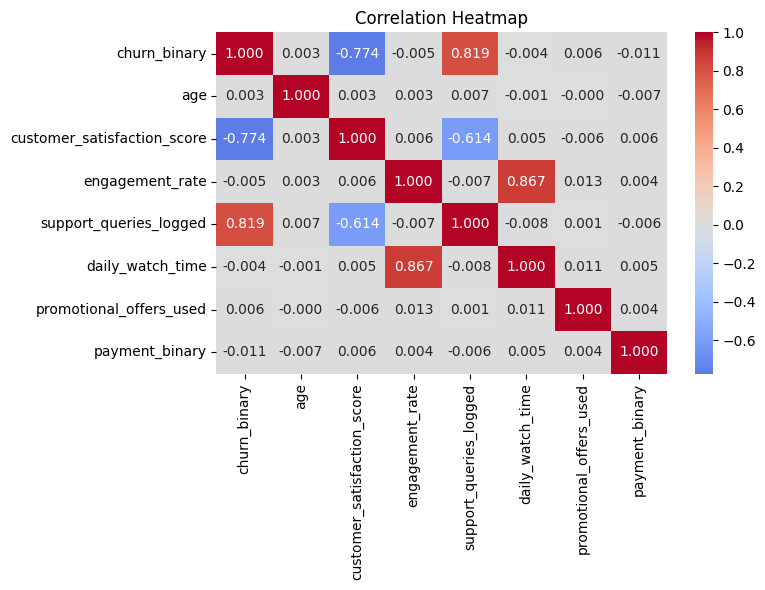

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlations, 
    annot=True, 
    fmt=".3f",     # 👈 Show 3 decimal places
    cmap='coolwarm', 
    center=0,
    cbar=True
)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Q10. What key behavioral differences exist between churned and retained users?



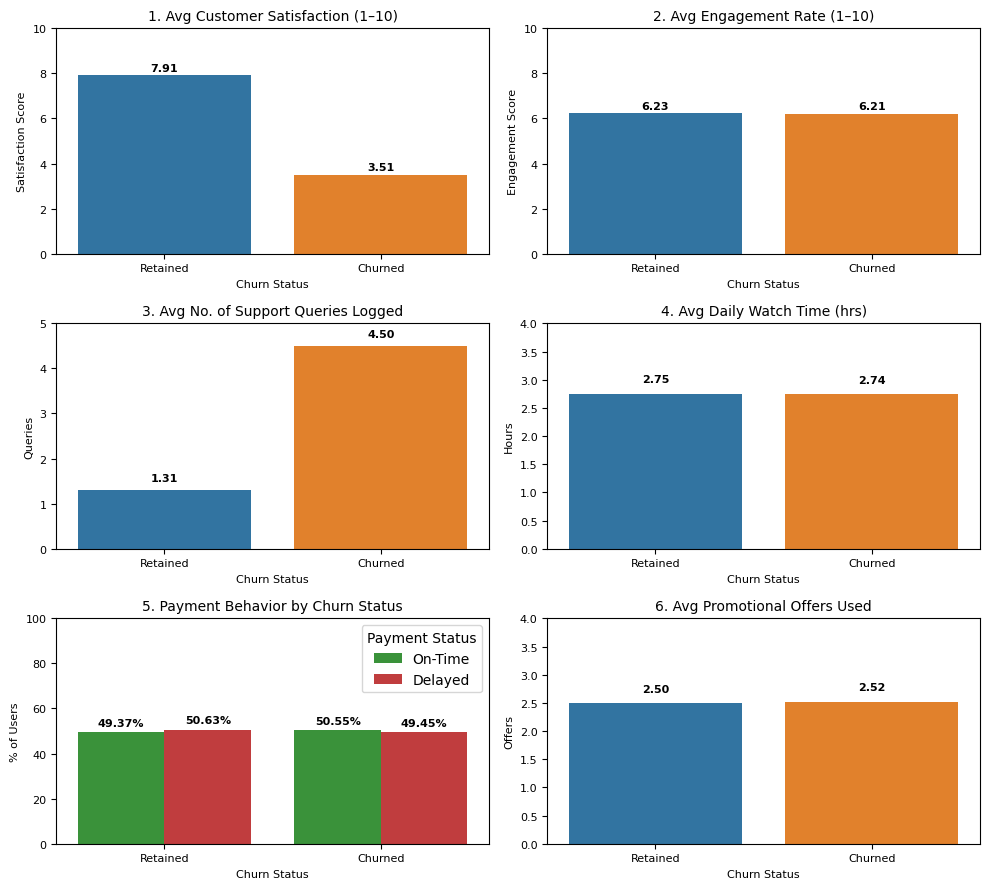

In [30]:
# 1. Grouped data for bar plots (excluding payment behavior for now)
grouped = df.groupby('churn_status').agg({
    'customer_satisfaction_score': 'mean',
    'engagement_rate': 'mean',
    'support_queries_logged': 'mean',
    'daily_watch_time': 'mean',
    'promotional_offers_used': 'mean'
}).round(2).reset_index()

# 2. Prepare data for Q5 (% of on-time vs delayed for each churn status)
payment_dist = df.groupby(['churn_status', 'payment_history'])['user_id'].count().reset_index()
payment_dist = payment_dist.pivot(index='churn_status', columns='payment_history', values='user_id').fillna(0)
payment_dist = payment_dist.div(payment_dist.sum(axis=1), axis=0).multiply(100).round(2).reset_index()

# 3. Set up 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 9))
axes = axes.flatten()
colors = ['#1f77b4', '#ff7f0e']  # Retained, Churned

# 4. Question 1: Customer Satisfaction
sns.barplot(x='churn_status', y='customer_satisfaction_score', data=grouped, hue='churn_status', ax=axes[0],
            palette=colors, legend=False)
axes[0].set_title('1. Avg Customer Satisfaction (1–10)', fontsize=10)
axes[0].set_ylabel('Satisfaction Score', fontsize=8)
max_val = grouped['customer_satisfaction_score'].max()
axes[0].set_ylim(0, max(10, round(max_val) + 1))
for i, val in enumerate(grouped['customer_satisfaction_score']):
    axes[0].text(i, val + 0.2, f"{val:.2f}", ha='center', fontweight='bold', fontsize=8)

# 5. Question 2: Engagement Rate
sns.barplot(x='churn_status', y='engagement_rate', data=grouped, hue='churn_status', ax=axes[1],
            palette=colors, legend=False)
axes[1].set_title('2. Avg Engagement Rate (1–10)', fontsize=10)
axes[1].set_ylabel('Engagement Score', fontsize=8)
max_val = grouped['engagement_rate'].max()
axes[1].set_ylim(0, max(10, round(max_val) + 1))
for i, val in enumerate(grouped['engagement_rate']):
    axes[1].text(i, val + 0.2, f"{val:.2f}", ha='center', fontweight='bold', fontsize=8)

# 6. Question 3: Support Queries
sns.barplot(x='churn_status', y='support_queries_logged', data=grouped, hue='churn_status', ax=axes[2],
            palette=colors, legend=False)
axes[2].set_title('3. Avg No. of Support Queries Logged', fontsize=10)
axes[2].set_ylabel('Queries', fontsize=8)
max_val = grouped['support_queries_logged'].max()
axes[2].set_ylim(0, round(max_val) + 1)
for i, val in enumerate(grouped['support_queries_logged']):
    axes[2].text(i, val + 0.2, f"{val:.2f}", ha='center', fontweight='bold', fontsize=8)

# 7. Question 4: Daily Watch Time
sns.barplot(x='churn_status', y='daily_watch_time', data=grouped, hue='churn_status', ax=axes[3],
            palette=colors, legend=False)
axes[3].set_title('4. Avg Daily Watch Time (hrs)', fontsize=10)
axes[3].set_ylabel('Hours', fontsize=8)
max_val = grouped['daily_watch_time'].max()
axes[3].set_ylim(0, round(max_val) + 1)
for i, val in enumerate(grouped['daily_watch_time']):
    axes[3].text(i, val + 0.2, f"{val:.2f}", ha='center', fontweight='bold', fontsize=8)

# 8. Question 5: % of Delayed vs On-Time Payments
payment_dist_melted = payment_dist.melt(id_vars='churn_status', value_vars=['On-Time', 'Delayed'],
                                        var_name='Payment Status', value_name='Percentage')
sns.barplot(x='churn_status', y='Percentage', hue='Payment Status', data=payment_dist_melted, ax=axes[4],
            palette=['#2ca02c', '#d62728'])  # Green = On-time, Red = Delayed
axes[4].set_title('5. Payment Behavior by Churn Status', fontsize=10)
axes[4].set_ylabel('% of Users', fontsize=8)
axes[4].set_ylim(0, 100)
for container in axes[4].containers:
    axes[4].bar_label(container, fmt='%.2f%%', padding=3, fontsize=8, fontweight='bold')

# 9. Question 6: Promotional Offers Used
sns.barplot(x='churn_status', y='promotional_offers_used', data=grouped, hue='churn_status', ax=axes[5],
            palette=colors, legend=False)
axes[5].set_title('6. Avg Promotional Offers Used', fontsize=10)
axes[5].set_ylabel('Offers', fontsize=8)
max_val = grouped['promotional_offers_used'].max()
axes[5].set_ylim(0, round(max_val) + 1)
for i, val in enumerate(grouped['promotional_offers_used']):
    axes[5].text(i, val + 0.2, f"{val:.2f}", ha='center', fontweight='bold', fontsize=8)

# 10. Final formatting: Axis labels and ticks
for ax in axes:
    ax.set_xlabel('Churn Status', fontsize=8)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Retained', 'Churned'], fontsize=8)
    ax.tick_params(axis='both', labelsize=8)  # Y-axis tick labels font size

plt.tight_layout()
plt.show()


# Q11. What % of retained users are currently at high risk of churning?

In [31]:
from datetime import datetime, timedelta

# Convert 'last_login' to datetime
df['last_login_date'] = pd.to_datetime(df['last_login_date'])

# Define base date and cutoff for inactivity
base_date = datetime(2025, 6, 10)
inactivity_cutoff = base_date - timedelta(days=45)  # April 26, 2025

# Median support queries to define "higher-than-normal" support interaction
median_queries = df['support_queries_logged'].median()

# Filter retained users (not churned)
retained = df[df['churn_status'] == 'No']
total_retained = retained.shape[0]

# Define Condition A: Inactive for 45+ days (on or before April 26, 2025)
condition_a = (
    (df['churn_status'] == 'No') &
    (df['last_login_date'] <= inactivity_cutoff)
)

# Define Condition B: Behavioral red flags
condition_b = (
    (df['churn_status'] == 'No') &
    (df['customer_satisfaction_score'].between(3, 7)) &
     (df['support_queries_logged'] > median_queries)
     # &
    # (df['payment_history'] == 'Delayed') &
    # (df['daily_watch_time']<=1.5) &
    # (df['engagement_rate']<5)
)

# Count users meeting each condition
inactive_count = df[condition_a].shape[0]
behavioral_count = df[condition_b].shape[0]
#combined_count = df[condition_a | condition_b].shape[0]  # Union of A and B

# Calculate percentages safely
if total_retained > 0:
    inactivity_percent = (inactive_count / total_retained) * 100
    behavioral_percent = (behavioral_count / total_retained) * 100
    #total_risk_percent = (combined_count / total_retained) * 100

    # Print results
    print(f"Total retained users: {total_retained}")
    print(f"1. % of users at risk due to inactivity (45+ days, on or before): {inactivity_percent:.2f}%")
    print(f"2. % of users at risk due to behavioral issues: {behavioral_percent:.2f}%")
    #print(f"3. % total at-risk users (either condition): {total_risk_percent:.2f}%")
else:
    print("No retained users found in the dataset.")


Total retained users: 16440
1. % of users at risk due to inactivity (45+ days, on or before): 10.25%
2. % of users at risk due to behavioral issues: 3.73%
